   id_patient  freq_cardiaque  tension_arterielle  taux_glucose
0           1              60                 128           119
1           2              63                 111            94
2           3              63                 122            72
3           4              99                 110            73
4           5              69                 119           147
Moyenne de la fréquence cardiaque: 79.292
Moyenne vérifiée avec pandas: 79.292


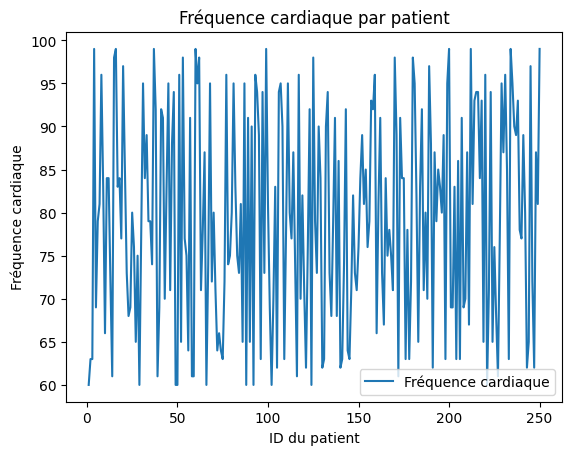

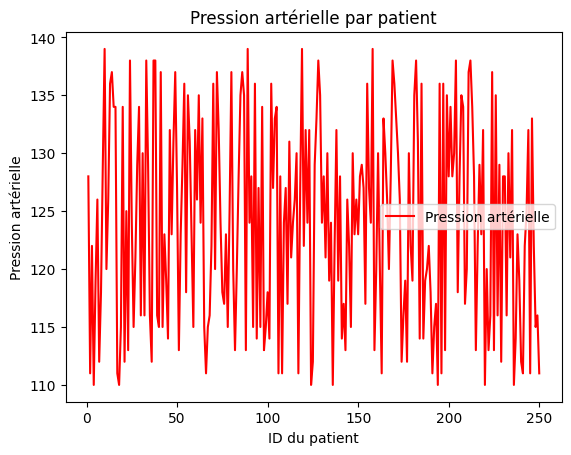

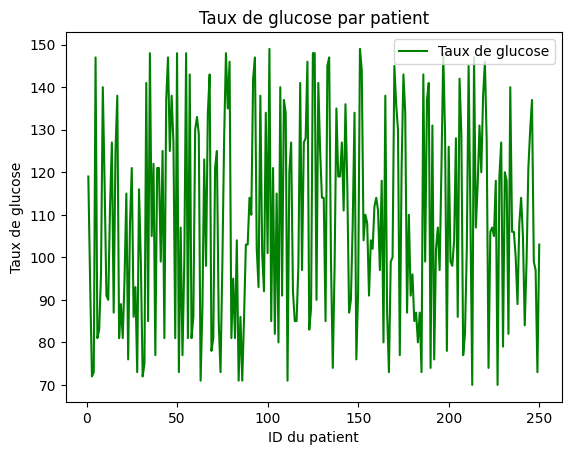

[3, 0, 36, -30, 10]


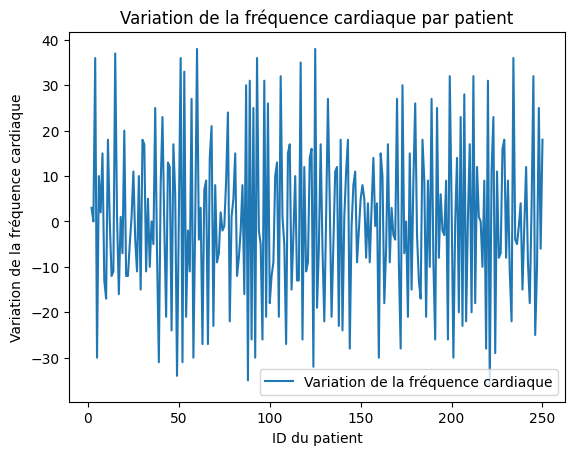

ValueError: too many values to unpack (expected 2)

In [7]:
import pandas as pd

# Charger les données
data = pd.read_csv('data_sante.csv')
print(data.head())

# Filtrer les données pour obtenir les mesures de fréquence cardiaque
frequences_cardiaques = data["freq_cardiaque"]
# id_patient,freq_cardiaque,tension_arterielle,taux_glucose

# Calculer la moyenne de la fréquence cardiaque à l'aide d'une boucle
total = 0
compteur_frequences = 0
for value in frequences_cardiaques:
    total += value
    compteur_frequences += 1
moy_freq_cardiaques = total / compteur_frequences
print(f'Moyenne de la fréquence cardiaque: {moy_freq_cardiaques}')

# Vérifier la moyenne avec pandas
moy_freq_cardiaques_pandas = frequences_cardiaques.mean()
print(f'Moyenne vérifiée avec pandas: {moy_freq_cardiaques_pandas}')

import matplotlib.pyplot as plt

# Tracer la fréquence cardiaque par patient
plt.plot(data["id_patient"], frequences_cardiaques, label='Fréquence cardiaque')
plt.xlabel('ID du patient')
plt.ylabel('Fréquence cardiaque')
plt.title('Fréquence cardiaque par patient')
plt.legend()
plt.show()

# Tracer la pression artérielle par patient
plt.plot(data["id_patient"], data["tension_arterielle"], label='Pression artérielle', color='red')
plt.xlabel('ID du patient')
plt.ylabel('Pression artérielle')
plt.title('Pression artérielle par patient')
plt.legend()
plt.show()

# Tracer le taux de glucose par patient
plt.plot(data["id_patient"], data["taux_glucose"], label='Taux de glucose', color='green')
plt.xlabel('ID du patient')
plt.ylabel('Taux de glucose')
plt.title('Taux de glucose par patient')
plt.legend()
plt.show()

# Calculer la dérivée de la fréquence cardiaque
heart_rate_derivative = [frequences_cardiaques[i] - frequences_cardiaques[i-1] for i in range(1, len(frequences_cardiaques))]
print(heart_rate_derivative[:5])

# Visualiser la dérivée
plt.plot(data["id_patient"][1:], heart_rate_derivative, label='Variation de la fréquence cardiaque')
plt.xlabel('ID du patient')
plt.ylabel('Variation de la fréquence cardiaque')
plt.title('Variation de la fréquence cardiaque par patient')
plt.legend()
plt.show()

import numpy as np

# Régression linéaire
x = np.array(data["id_patient"])
y = np.array(frequences_cardiaques)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)
print(f'Pente: {m}, Intercept: {c}')

# Visualiser la régression linéaire
plt.plot(x, y, 'o', label='Données originales', markersize=10)
plt.plot(x, m*x + c, 'r', label='Régression linéaire')
plt.xlabel('ID du patient')
plt.ylabel('Fréquence cardiaque')
plt.title('Régression linéaire de la fréquence cardiaque par patient')
plt.legend()
plt.show()
